## Get Data

In [1]:
!wget -P /content/data/ https://zenodo.org/record/1322001/files/test_set.zip?download=1

--2020-10-14 07:16:05--  https://zenodo.org/record/1322001/files/test_set.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43751086 (42M) [application/octet-stream]
Saving to: ‘/content/data/test_set.zip?download=1’

test_set.zip?downlo 100%[===================>]  41.72M  6.09MB/s    in 8.6s    

2020-10-14 07:16:15 (4.88 MB/s) - ‘/content/data/test_set.zip?download=1’ saved [43751086/43751086]



In [2]:
!wget -P /content/data/ https://zenodo.org/record/1322001/files/training_set.zip?download=1

--2020-10-14 07:16:15--  https://zenodo.org/record/1322001/files/training_set.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132986834 (127M) [application/octet-stream]
Saving to: ‘/content/data/training_set.zip?download=1’

training_set.zip?do 100%[===================>] 126.83M  8.11MB/s    in 31s     

2020-10-14 07:16:49 (4.05 MB/s) - ‘/content/data/training_set.zip?download=1’ saved [132986834/132986834]



In [3]:
import zipfile
path_to_zip_file='/content/data/test_set.zip?download=1'
directory_to_extract_to='/content/data/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
import zipfile
path_to_zip_file='/content/data/training_set.zip?download=1'
directory_to_extract_to='/content/data/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

UnidentifiedImageError: cannot identify image file './data/training_set/Thumbs.db'
Test set cung co file Thumbs.db này


## Data Exploration

In the Data exploration subsection, we inspected the data to understand more about it. First,
we got the list of images and annotations in the training_set folder. The annotations files
have the term Annotation in the filename. As we previously learned, there were 999
images and 999 annotation files in the folder.

In [5]:
import os
path2train="./data/training_set/"

In [6]:
#remove thumb file
path = './data/training_set/Thumbs.db' 
os.remove(path)

In [7]:
#import glob
#print(glob.glob("./data/training_set/*"))

In [8]:
imgsList=[pp for pp in os.listdir(path2train) if "Annotation" not in pp]
anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]
print("number of images:", len(imgsList))
print("number of annotations:", len(anntsList))

number of images: 999
number of annotations: 999


In the Data exploration subsection, we inspected the data to understand more about it. First,
we got the list of images and annotations in the training_set folder. The annotations files
have the term Annotation in the filename. As we previously learned, there were 999
images and 999 annotation files in the folder.

In [9]:
import numpy as np
np.random.seed(2019)
rndImgs=np.random.choice(imgsList,4)
rndImgs

array(['895_2HC.png', '353_HC.png', '930_HC.png', '422_HC.png'],
      dtype='<U11')

In the function, we used mark_boundaries from the skimage.segmentation package to
overlay the mask on the image.


In [10]:
import matplotlib.pylab as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch

def show_img_mask(img, mask):
    if torch.is_tensor(img):
        img=to_pil_image(img)
        mask=to_pil_image(mask)
        
    img_mask=mark_boundaries(np.array(img), 
                        np.array(mask),
                        outline_color=(0,1,0),
                        color=(0,1,0))
    plt.imshow(img_mask)
    

Note that the annotation files contain the edges of the fetal head. As such,
we converted the edges to binary masks using the binary_fill_holes
function from the scipy.ndimage package. The screenshot displayed
original ultrasound images on the left, binary masks of the fetal heads in
the middle, and the image overlay on the right

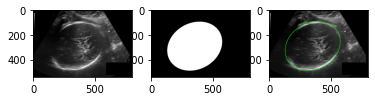

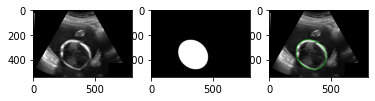

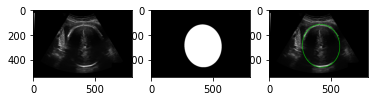

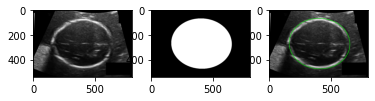

In [11]:

for fn in rndImgs:
    path2img = os.path.join(path2train, fn)
    path2annt= path2img.replace(".png", "_Annotation.png")
    img = Image.open(path2img)
    annt_edges = Image.open(path2annt)
    mask = ndi.binary_fill_holes(annt_edges)        

    plt.figure()
    plt.subplot(1, 3, 1) 
    plt.imshow(img, cmap="gray")

    plt.subplot(1, 3, 2) 
    plt.imshow(mask, cmap="gray")

    plt.subplot(1, 3, 3) 
    show_img_mask(img, mask)
    

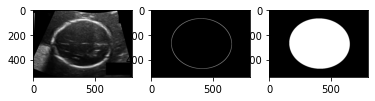

In [12]:

path2img = os.path.join(path2train, fn)
path2annt= path2img.replace(".png", "_Annotation.png")
img = Image.open(path2img)
annt_edges = Image.open(path2annt)
mask = ndi.binary_fill_holes(annt_edges) 
plt.figure()
plt.subplot(1, 3, 1) 
plt.imshow(img, cmap="gray")

plt.subplot(1, 3, 2) 
plt.imshow(annt_edges, cmap="gray")

plt.subplot(1, 3, 3) 
plt.imshow(mask, cmap="gray")
#Note that the annotation files contain the edges of the fetal head. As such, we converted the
#edges to binary masks using the binary_fill_holes function from the scipy.ndimage package

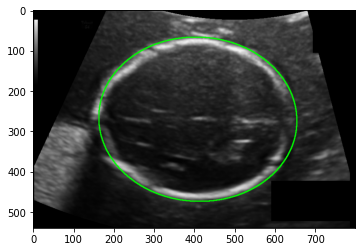

In [13]:
plt.subplot(1, 1, 1) 
show_img_mask(img, mask)

(-0.5, 799.5, 539.5, -0.5)

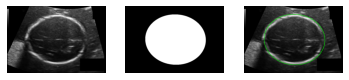

In [14]:
plt.figure()
plt.subplot(1, 3, 1) 
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2) 
plt.imshow(mask, cmap="gray")
plt.axis('off')    

plt.subplot(1, 3, 3) 
show_img_mask(img, mask)
plt.axis('off')


Data augmentation

In the Data augmentation subsection, we used a popular Python package called
albumentations for data transformation. For the first time, you needed to install the
package, as shown in step 1. Make sure that you install the package in the conda
environment that we created for this book. The package has a rich set of various
augmentation and transformation techniques. In step 2, we imported a few of these
packages. Next, for the training dataset, we composed a vertical and horizontal flip,
resizing the images to 128 x 192. For the validation dataset, we only performed the resizing
transformation. We will pass these transformations to the PyTorch dataset class in the next
subsection.

In [15]:
from albumentations import (
    HorizontalFlip,
    VerticalFlip,    
    Compose,
    Resize,
)

h,w=128,192
transform_train = Compose([ Resize(h,w), 
                HorizontalFlip(p=0.5), 
                VerticalFlip(p=0.5), 
              ])


transform_val = Resize(h,w)


## Creating Custom Dataset

In [16]:
from torch.utils.data import Dataset
from PIL import Image

In [18]:
from torchvision.transforms.functional import to_tensor, to_pil_image

class fetal_dataset(Dataset):
    def __init__(self, path2data, transform=None):  
    #In the function, we got the list of images and annotations and initialized the variables    
        imgsList=[pp for pp in os.listdir(path2data) if "Annotation" not in pp]
        anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]

        self.path2imgs = [os.path.join(path2data, fn) for fn in imgsList] 
        self.path2annts= [p2i.replace(".png", "_Annotation.png") for p2i in self.path2imgs]

        self.transform = transform
    
    def __len__(self):
        return len(self.path2imgs)
    '''
    The __getitem__  function loads the image and annotation files and returns the image and
    binary mask. Note that we converted the arrays to PyTorch tensors using the to_tensor
    function at the end. The to_tensor function normalizes the values by diving them to 255.
    As such, we scaled back the mask values to the range of [0, 1] by multiplying it by 255.
    ''' 
    def __getitem__(self, idx):
        path2img = self.path2imgs[idx]
        image = Image.open(path2img)

        path2annt = self.path2annts[idx]
        annt_edges = Image.open(path2annt)
        mask = ndi.binary_fill_holes(annt_edges)        
        
        image= np.array(image)
        mask=mask.astype("uint8")        

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']            

        image= to_tensor(image)            
        mask=255*to_tensor(mask)            
        return image, mask


In step 2, we defined two objects of the fetal_dataset class by passing
transform_train and transform_val to the class, respectively. As expected, the length
of both fetal_ds1 and fetal_ds2 is 999.

In [19]:
fetal_ds1=fetal_dataset(path2train, transform=transform_train)
fetal_ds2=fetal_dataset(path2train, transform=transform_val)
print(len(fetal_ds1))
print(len(fetal_ds2))

999
999


In step 3, we fetched and displayed an image and a mask from fetal_ds1. Note the shape,
type, and maximum value in the image and mask. As you can see, the image and mask
have been resized to 128 x 192, which are of the torch.FloatTensor type, and have a
maximum value of 1.

In [20]:
img,mask=fetal_ds1[0]
print(img.shape, img.type(),torch.max(img))
print(mask.shape, mask.type(),torch.max(mask))

torch.Size([1, 128, 192]) torch.FloatTensor tensor(0.9529)
torch.Size([1, 128, 192]) torch.FloatTensor tensor(1.)


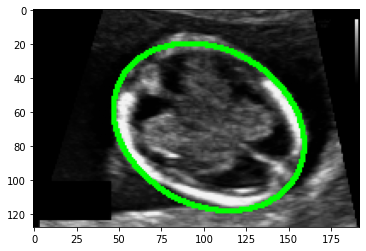

In [21]:
show_img_mask(img, mask)

### Split data into train validation

In step 4, we created two lists of train_index and val_index by separating 20 percent of
the indices from the total indices.

In [22]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(fetal_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

799
----------
200


In step 5, we passed the train_index and val_index to the Subset class from
the torch.utils.data package to create the training and validation datasets,
respectively.

In [23]:
from torch.utils.data import Subset

train_ds=Subset(fetal_ds1,train_index)
print(len(train_ds))

val_ds=Subset(fetal_ds2,val_index)
print(len(val_ds))

799
200


In step 6, we displayed the sample image and mask from train_ds and val_ds,
respectively.

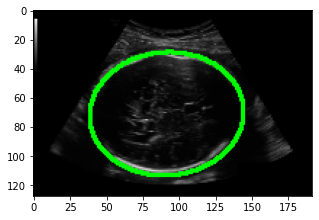

In [24]:
plt.figure(figsize=(5,5))
for img,mask in train_ds:
    show_img_mask(img,mask)
    break

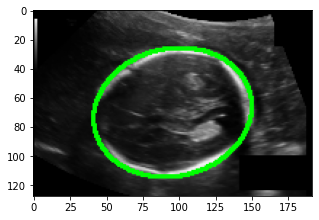

In [25]:
plt.figure(figsize=(5,5))
for img,mask in val_ds:
    show_img_mask(img,mask)
    break

### Creating DataLoader

In step 7, we defined two data loaders, train_dl, and val_dl, using the DataLoader
class to be able to fetch data batches from the training and validation datasets during
training.

In [26]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False) 

In step 8, we got a data batch from train_dl and val_dl, and printed their respective
shapes. As we saw, tensors of size [batch_size, 128, 192] were returned from the
data loaders.

In [27]:
for img_b, mask_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

torch.Size([8, 1, 128, 192]) torch.float32
torch.Size([8, 1, 128, 192]) torch.float32


In [28]:
for img_b, mask_b in val_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

torch.Size([16, 1, 128, 192]) torch.float32
torch.Size([16, 1, 128, 192]) torch.float32


In [29]:
torch.max(img_b)

tensor(0.9608)

## Creating the Model

The popular model architecture for segmentation tasks is the so-called encoder–decoder
model, as shown in the following screenshot:

In the first half of the encoder–decoder model, the input image is downsized to a feature
map using a few layers of convolutional neural networks (CNNs) and pooling layers. In
the second half of the model, the feature map is up-sampled to the input image size to
produce a binary mask. The encoder–decoder model was further updated based on the
concept of skip-connections from ResNet to another popular architecture called U-Net. In
this recipe, we will learn how to develop an encoder–decoder model for single-object image
segmentation using PyTorch

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class SegNet(nn.Module):
    def __init__(self, params):
        super(SegNet, self).__init__()
        
        C_in, H_in, W_in=params["input_shape"] # A tuple, the model input shape (1, height, width)
        init_f=params["initial_filters"]  # An integer, the number of filters in the first CNN layer
        num_outputs=params["num_outputs"] # An integer, the number of output channels; pass 1 for singleobject segmentation
        '''
        In the __init__ function, we defined the building blocks of the model. This included five
        CNN blocks for down-sampling the input, an up-sampling block, and another five CNN
        blocks for up-sampling the feature map.
        '''
        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(8*init_f, 16*init_f, kernel_size=3,padding=1)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up1 = nn.Conv2d(16*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv_up2 = nn.Conv2d(8*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv_up3 = nn.Conv2d(4*init_f, 2*init_f, kernel_size=3,padding=1)
        self.conv_up4 = nn.Conv2d(2*init_f, init_f, kernel_size=3,padding=1)

        self.conv_out = nn.Conv2d(init_f, num_outputs , kernel_size=3,padding=1)    
    #Note that no activation function was applied to the output layer in the model definition
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv5(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up1(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up2(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up3(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up4(x))

        x = self.conv_out(x)
        
        return x 

In step 2, we defined an object of the SegNet class and called it mode

In [32]:
params_model={
        "input_shape": (1,h,w),
        "initial_filters": 16, 
        "num_outputs": 1,
            }

model = SegNet(params_model)

In step 3, we moved
the model to the GPU device if the device was available

In [33]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In step 4, we printed the model. In
step 5, we printed the model summary using the torchsummary package. Note that
torchsummary is not a built-in PyTorch package and you need to separately install it (if
you haven't already) in the conda environment, as explained in Chapter 1, Getting Started
with PyTorch for Deep Learning

In [34]:
print(model)

SegNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (conv_up1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [35]:
from torchsummary import summary
summary(model, input_size=(1, h, w))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 192]             160
            Conv2d-2           [-1, 32, 64, 96]           4,640
            Conv2d-3           [-1, 64, 32, 48]          18,496
            Conv2d-4          [-1, 128, 16, 24]          73,856
            Conv2d-5           [-1, 256, 8, 12]         295,168
          Upsample-6          [-1, 256, 16, 24]               0
            Conv2d-7          [-1, 128, 16, 24]         295,040
          Upsample-8          [-1, 128, 32, 48]               0
            Conv2d-9           [-1, 64, 32, 48]          73,792
         Upsample-10           [-1, 64, 64, 96]               0
           Conv2d-11           [-1, 32, 64, 96]          18,464
         Upsample-12         [-1, 32, 128, 192]               0
           Conv2d-13         [-1, 16, 128, 192]           4,624
           Conv2d-14          [-1, 1, 1

## Define Loss Function

So far, we have created a dataset and a model. To train the model, we need to define a loss
function and an optimizer to update the model parameters based on the gradients of the
loss. The classical loss function for single-object segmentation is the binary cross-entropy
(BCE) loss function. The BCE loss function compares each pixel of the prediction with that
of the ground truth; however, we can combine multiple criteria to improve the overall
performance of segmentation tasks. A popular technique is to combine the dice metric with
the BCE loss. The dice metric is commonly used to test the performance of segmentation
algorithms by calculating the amount of overlap between the ground truth and the
prediction. In this section, you will learn how to develop a combined loss function. Then,
you will define the optimizer to automatically update the model parameters during
training.

In step 1, we defined the dice_loss helper function to calculate the dice loss value. The
inputs to the function were as follows:
- pred: A tensor with a (batch_size, 1, height, width) shape,
corresponding to predictions
- target: A tensor with a (batch_size, 1, height, width) shape,
corresponding to the ground truth

The function calculates the dice value per data batch. The dice value is between [0, 1],
where a value of 1 represents a perfect overlap between the prediction and the ground
truth. The dice loss is calculated as (1- dice), since we wanted to minimize the value. The
function returns the sum of loss values per data batch

In [36]:
def dice_loss(pred, target, smooth = 1e-5):

    intersection = (pred * target).sum(dim=(2,3))
    union= pred.sum(dim=(2,3)) + target.sum(dim=(2,3)) 
    
    dice= 2.0 * (intersection + smooth) / (union+ smooth)    
    loss = 1.0 - dice
    
    return loss.sum(), dice.sum()

In step 2, we defined the loss_func helper function to compute the combined loss value
per data batch. The function has two inputs:
- pred: A tensor with a (batch_size, 1, height, width) shape,
corresponding to predictions
- target: A tensor with a (batch_size, 1, height, width) shape,
corresponding to the ground truth

In the function, we first calculated the binary cross-entropy loss. Next, we calculated the
dice loss and returned the sum of the two losses per data batch.

Note that the sigmoid operation is integrated into
the binary_cross_entropy_with_logits function. Remember that the
model output does not include the sigmoid activation function.

In [37]:

import torch.nn.functional as F

def loss_func(pred, target):
    bce = F.binary_cross_entropy_with_logits(pred, target,  reduction='sum')
    
    pred= torch.sigmoid(pred)
    dlv, _ = dice_loss(pred, target) # return loss.sum()
    
    loss = bce  + dlv

    return loss

In [38]:
for img_v,mask_v in val_dl:
    mask_v= mask_v[8:]
    break

for img_t,mask_t in train_dl:
    break

In [39]:
print(dice_loss(mask_v,mask_v))
loss_func(mask_v,torch.zeros_like(mask_v))

(tensor(0.), tensor(8.))


tensor(168017.9375)

In step 3, we defined the metrics_batch helper function to compute a metric per batch.
You can calculate any metric you want inside this helper function. We calculated the dice
metric by calling the dice_loss helper function. The dice metric is a popular metric for
evaluating segmentation tasks.

In [40]:
import torchvision

def metrics_batch(pred, target):
    pred= torch.sigmoid(pred)
    _, metric=dice_loss(pred, target) #return dice.sum()
    
    return metric 

In step 4, we defined the loss_batch helper function. The inputs to the helper function are
as follows:
- loss_func: Combined loss function defined in step 2
- output: A tensor with a (batch_size, 1, height, width) shape containing
predictions
- target: A tensor with a (batch_size, 1, height, width) shape containing
the ground truth
- opt: An object of the optimizer

In the function, we calculated the loss and metric values per data batch. During training,
the optimizer object is passed to the helper function, and, as a result, the model parameters
are updated using opt.step()

In [41]:
def loss_batch(loss_func, output, target, opt=None):   
    loss = loss_func(output, target)
    
    pred= torch.sigmoid(output)
    _, metric_b=dice_loss(pred, target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

## Optimizer

In step 5, we defined the Adam optimizer to optimize the model during training

In [42]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In step 6, we defined the learning rate schedule to automatically reduce the learning rate
during training in case of a plateau.

In [43]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [44]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


## Training the Model

So far, we have learned how to create the training and validation datasets, build the model,
and define the loss function and optimizer. At this point, it is time to train the model. This
is an iterative process. In each iteration, we select a data batch from the training dataset. We
then feed the data to the model to get the model output. Then, we calculate the loss value.
Next, we compute the gradients of the loss function with respect to the model parameters
(also known as weights). Finally, the optimizer updates the parameters based on the
gradients, and this loop continues. We also use the validation dataset to monitor the model
performance during training. We will stop the training process when the performance
plateaus. For better code readability, we will define a few helper functions.

In step 1, we defined the loss_epoch helper function. The function inputs are as follows:

- model: An object of the model
- loss_func: An object of the loss function
- dataset_dl: An object of the data loader
- sanity_check: A Boolean flag; default value is False
- opt: An object of the optimizer

In the function, we extracted data batches from the data loader as xb and yb tensors. Next,
we obtained the model output and calculated the loss and metric values per data batch. We
repeated the process for the entire dataset and returned the average loss and metric values

In [45]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        
        output=model(xb)
        loss_b, metric_b=loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric+=metric_b

        if sanity_check is True:
            break
    
    loss=running_loss/float(len_data)
    
    metric=running_metric/float(len_data)
    
    return loss, metric

In step 2, we defined the train_val helper function. The inputs to the function are as
follows:
- model: An object of the mode
- params: A Python dictionary containing the training parameters

In the function, we trained the model for num_epochs iterations. In each iteration, we set
the model in train mode and trained the model for an epoch. Then we evaluated the
model on the validation dataset. We stored the model parameters if the validation results
were improved in each iteration. We also used the learning rate schedule to reduce the
learning rate if the validation performance reached a plateau. The function returned the
trained model and two dictionaries containing the loss and metric values for each iteration

In [46]:
import copy
def train_val(model, params):
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    loss_history={
        "train": [],
        "val": []}
    
    metric_history={
        "train": [],
        "val": []}    
    
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            
        print("train loss: %.6f, dice: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, dice: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history        


In step 3, we set the training parameters in params_train and called the train_val
function to train the model.

In [49]:
opt = optim.Adam(model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 20, #100
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights.pt",
}

model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/19, current lr=0.0003
Copied best model weights!
train loss: 951.386576, dice: 95.13
val loss: 1400.237585, dice: 94.60
----------
Epoch 1/19, current lr=0.0003
train loss: 994.051859, dice: 95.10
val loss: 1497.884771, dice: 94.73
----------
Epoch 2/19, current lr=0.0003
train loss: 873.688578, dice: 95.54
val loss: 1415.360168, dice: 94.68
----------
Epoch 3/19, current lr=0.0003
train loss: 847.115797, dice: 95.65
val loss: 1416.528850, dice: 94.82
----------
Epoch 4/19, current lr=0.0003
train loss: 869.698669, dice: 95.51
val loss: 1588.434741, dice: 94.43
----------
Epoch 5/19, current lr=0.0003
train loss: 971.305072, dice: 95.00
val loss: 1554.417209, dice: 94.17
----------
Epoch 6/19, current lr=0.0003
train loss: 914.635457, dice: 95.13
val loss: 1546.118330, dice: 94.43
----------
Epoch 7/19, current lr=0.0003
train loss: 840.821893, dice: 95.60
val loss: 1514.349221, dice: 94.78
----------
Epoch 8/19, current lr=0.0003
train loss: 787.413046, dice: 95.88
val loss: 1

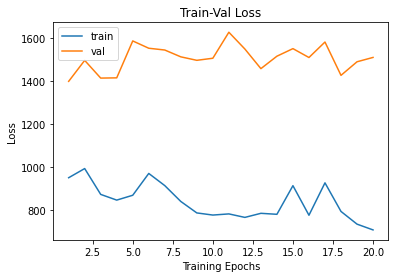

In [50]:
num_epochs=params_train["num_epochs"]

plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

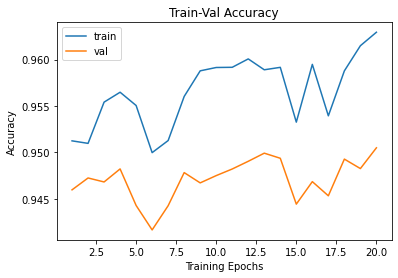

In [51]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()